In [43]:
import os
import matplotlib.image as img
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import MDS

file_list: ['kangdongwon.jpg', 'kwakdowon.jpg', 'dean.jpg', 'donghyunchoi_porto_45degree.jpg', 'donghyunchoi_graduate.jpg', 'leebyunghyun.jpg', '.ipynb_checkpoints', 'lucidfall.jpg', 'wonbin.jpg', 'jojungseok.jpg', 'parkseojun.jpg', 'songjoongki.jpg', 'donghyunchoi.jpg', 'kanghaneul.jpg', 'junghaein.jpg', 'kimhyukgun.jpg', 'parkbogum.jpg', 'jangdonggun.jpg', 'roykim.jpg', 'madongseok.jpg', 'gongyoo.jpg', 'yooseungmin.jpg', 'kimdaemyung.jpg', 'v.jpg', 'yoonjongshin.jpg', 'yooheeyeol.jpg', 'leeseunggi.jpg', 'sungsikyung.jpg']


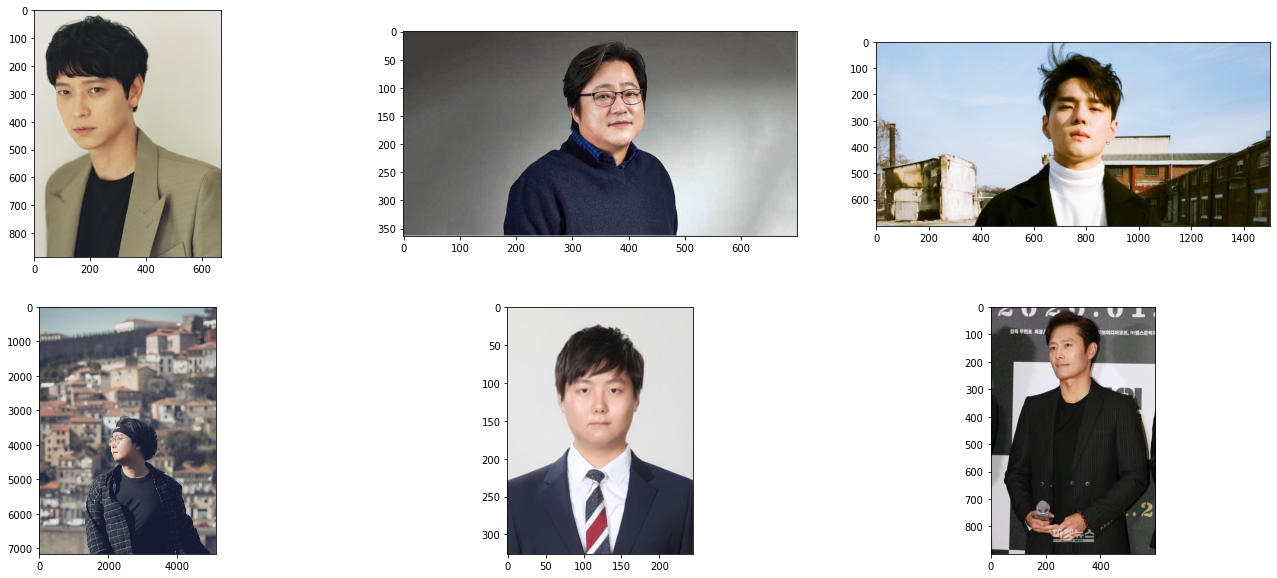

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/exp5/face_folder'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

[(1252, 2019, 2403, 869)]


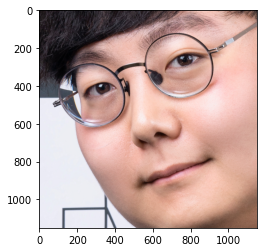

In [3]:
image_path = os.getenv('HOME')+'/aiffel/exp5/face_folder/donghyunchoi.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## 다양한 각도의 이미지를 넣어서 어느 정도의 사진까지 얼굴인식이 되는지 시도했습니다.
## 정면은 대부분 문제 없이 인식이 되지만 완전한 옆얼굴은 인식이 되지 않았습니다.
## 45도  정도 기울어진, 두 눈이 모두 보이는 이미지까지는 인식이 되는 것을 확인할 수 있었습니다.
## 해당 패키지는 양쪽눈이 모두 보일 때 작동하는 것으로 생각됩니다.
## 안경을 쓰거나 앞머리가 긴 경우 인식이 안 되는 사진들이 있습니다.
## 사람의 눈으로는 완전하게 보이는 얼굴이더라도 얼굴이 사진의 경계선에 위치한 경우 인식이 안 되는 경우가 있었습니다.

[(3620, 2644, 4419, 1845)]


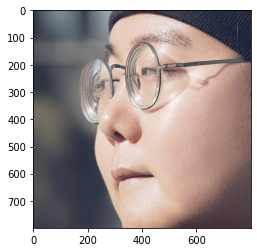

In [4]:
image_path = os.getenv('HOME')+'/aiffel/exp5/face_folder/donghyunchoi_porto_45degree.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

In [5]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face

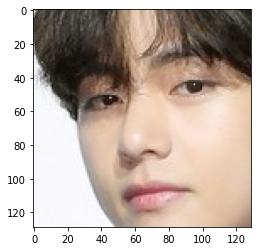

In [6]:
image_path = os.getenv('HOME')+'/aiffel/exp5/face_folder/v.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

In [7]:
image_file = os.path.join(dir_path, 'donghyunchoi.jpg')
face = get_cropped_face(image_file)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.01150211,  0.02852564,  0.01965718,  0.00578237, -0.14177212,
        -0.05043375, -0.0291928 , -0.07255214,  0.1154207 , -0.11467128,
         0.16543402, -0.07985448, -0.15940368, -0.01396723,  0.02698012,
         0.14294982, -0.11288483, -0.09445236, -0.12786934, -0.03307763,
         0.08337344,  0.06177855, -0.01986114,  0.03459632, -0.09690735,
        -0.35958225, -0.10375199, -0.0847578 ,  0.08248691, -0.08180895,
        -0.04996595,  0.13966852, -0.12169607, -0.06105034,  0.03221566,
         0.0770362 , -0.02354913, -0.10271364,  0.14999668, -0.02092106,
        -0.30158964,  0.02806223,  0.04982333,  0.22356728,  0.16863567,
        -0.04431926,  0.07412836, -0.09963285,  0.09719557, -0.16179375,
         0.03134917,  0.11405808,  0.07842346,  0.06945381,  0.03425517,
        -0.09437712,  0.03903462,  0.0581196 , -0.14845146,  0.01262929,
         0.1299549 , -0.1150143 , -0.03599459, -0.03284193,  0.14124203,
         0.03620827, -0.05258939, -0.19165498,  0.1

## 주피터노트북의 임시 파일이 해당 사진 폴더에 생성되는 문제가 발생하여 딕셔너리 생성과정에서 jpg파일만 받도록 설정했습니다.

In [8]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        if file.endswith(".jpg"):
            print(file)
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
        
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                
    return embedding_dict

In [9]:
dir_path = os.getenv('HOME')+'/aiffel/exp5/face_folder'
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['v']

kangdongwon.jpg
kwakdowon.jpg
dean.jpg
donghyunchoi_porto_45degree.jpg
donghyunchoi_graduate.jpg
leebyunghyun.jpg
lucidfall.jpg
wonbin.jpg
jojungseok.jpg
parkseojun.jpg
songjoongki.jpg
donghyunchoi.jpg
kanghaneul.jpg
junghaein.jpg
kimhyukgun.jpg
parkbogum.jpg
jangdonggun.jpg
roykim.jpg
madongseok.jpg
gongyoo.jpg
yooseungmin.jpg
kimdaemyung.jpg
v.jpg
yoonjongshin.jpg
yooheeyeol.jpg
leeseunggi.jpg
sungsikyung.jpg


array([-0.07937687,  0.05263703, -0.01839924, -0.09460463, -0.09292047,
       -0.07551213, -0.13723935, -0.07842774,  0.12418062, -0.10192095,
        0.14845489, -0.02752627, -0.19633491, -0.03363395, -0.06330923,
        0.16996028, -0.11040434, -0.15987436, -0.03707047,  0.02859241,
        0.08920913,  0.06284325, -0.01948921,  0.08207411, -0.15955889,
       -0.29632822, -0.1172111 , -0.0509657 , -0.04128568, -0.04212796,
       -0.01354582, -0.0028079 , -0.22926977, -0.04035266,  0.09287926,
        0.10807545,  0.02441265, -0.1038406 ,  0.20436546,  0.04128843,
       -0.28576231,  0.06962787,  0.09386604,  0.23077396,  0.14288054,
        0.00220197,  0.03062959, -0.19240795,  0.15301816, -0.13889115,
        0.07343592,  0.15863669,  0.02797318,  0.0653047 ,  0.01257154,
       -0.1091243 ,  0.10405632,  0.18285543, -0.19784893, -0.01536019,
        0.08025196,  0.02415339, -0.01699084, -0.07331163,  0.19625886,
        0.03547266, -0.13306253, -0.19368911,  0.13554129, -0.15

In [10]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('donghyunchoi', 'v')

0.6398468485165079

In [11]:
get_distance('donghyunchoi', 'kwakdowon')

0.4969112539975309

In [12]:
get_distance('donghyunchoi', 'kangdongwon')

0.6780451780425031

In [13]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [14]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0:
            print('내 사진 : {}'.format(sorted_faces[i][0]))
            image = img.imread(dir_path+'/'+sorted_faces[i][0]+'.jpg')
            plt.imshow(image)
            plt.show()
            print()
            continue
        if sorted_faces[i]:
            print('순위 {} : {}, 거리 : {}'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            image = img.imread(dir_path+'/'+sorted_faces[i][0]+'.jpg')
            plt.imshow(image)
            plt.show()

내 사진 : donghyunchoi


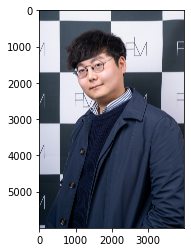


순위 1 : sungsikyung, 거리 : 0.4447052447890552


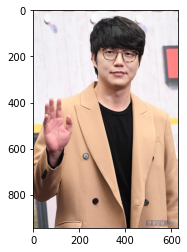

순위 2 : donghyunchoi_graduate, 거리 : 0.44774683374710567


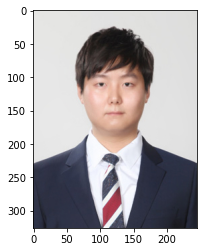

순위 3 : kimhyukgun, 거리 : 0.47555143769578423


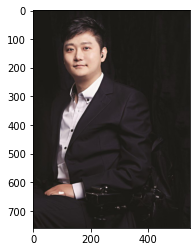

순위 4 : kimdaemyung, 거리 : 0.4869728487608878


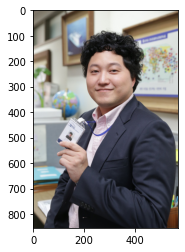

순위 5 : roykim, 거리 : 0.48922359384467595


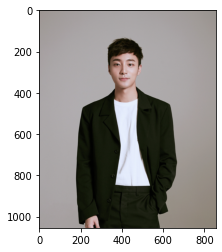

In [15]:
get_nearest_face('donghyunchoi')

In [16]:
get_distance('donghyunchoi', 'donghyunchoi_porto_45degree')

0.5149228035279367

## 처음에 프로젝트를 시작하기 전에 디지털 정보를 벡터로 변환하여 거리 비교를 하는 만큼 같은 사람이더라도 얼굴의 각도에 따라 거리의 차이가 많이 발생할 것이라 예상했습니다.
## 또한 같은 사람이더라도 시간 경과에 따라 얼굴이 달라진 경우 거리가 커질 것이라 예상했습니다.
## 프로젝트 진행결과 시간 경과가 꽤 되어 차이가 나는 사진의 경우에는 의외로 거리가 멀지 않게 나왔습니다. 꽤 근래의 사진(donghyunchoi)을 기준으로 거리 순위를 측정했을 때 졸업 사진(donghyunchoi_graduate)이 2순위를 기록했습니다.
## 45도 정도 틀어진 옆모습 (donghunchoi_porto_45degree)의 경우 거리가 크게 차이 날 것이라고 생각했지만 0.5149 수준으로 예상보다 작은 거리 차이를 보여주었습니다.
## 해당 결과로 보아 이목구비의 실제 모양만큼 경향성도 꽤 중요하게 작용하는 것이 아닌가 싶습니다.

 --------------- 
  
  
  

MDS 시각화 
=========

## 해당 노드에는 없는 내용이지만 평가항목에서 추가적인 시각화를 요구하여 진행하게 되었습니다.
## 순위만을 표시하는 것 보다 전체적인 유사도를 확인할 방도에 대해 고민하다 다차원척도법을 사용하였습니다.

## 위에서 이미 만든 임베딩 딕셔너리와 거리 구하기 함수를 통해 거리 데이터프레임을 생성하였습니다.

In [27]:
def get_face_df(embedding_dict):
    df_dict = {}
    index_list = []
    column_list = []
    
    for i in embedding_dict:
        df_list = []
        index_list.append(i)
        column_list.append(i)
        for j in embedding_dict:
            df_list.append(get_distance(i, j))
        df_dict[i] = df_list
        
    face_df = pd.DataFrame(df_dict, columns = column_list, index = index_list)
    face_df
    return face_df

In [36]:
face_df = get_face_df(embedding_dict)

## 입력된 파일 수 만큼의 정사각형 행렬의 데이터프레임을 얻을 수 있었습니다.
## 당연하게도 대각행렬은 자기 자신과의 거리이기에 대각행렬의 거리는 모두 0입니다.

In [59]:
face_df

,kangdongwon,kwakdowon,dean,donghyunchoi_porto_45degree,donghyunchoi_graduate,leebyunghyun,lucidfall,wonbin,jojungseok,parkseojun,...,jangdonggun,roykim,madongseok,gongyoo,yooseungmin,kimdaemyung,v,yoonjongshin,yooheeyeol,sungsikyung
kangdongwon,0.000000,0.629474,0.510099,0.619219,0.611304,0.478369,0.501887,0.521967,0.504634,0.506883,...,0.599978,0.501765,0.659452,0.557399,0.685681,0.528434,0.565216,0.641219,0.591041,0.608005
kwakdowon,0.629474,0.000000,0.540654,0.517361,0.530243,0.521535,0.544516,0.574200,0.486021,0.559422,...,0.619997,0.488856,0.435775,0.583496,0.482664,0.417537,0.611829,0.609227,0.612026,0.403392
dean,0.510099,0.540654,0.000000,0.600272,0.524378,0.560592,0.511372,0.531265,0.567744,0.435317,...,0.568828,0.426326,0.556698,0.480613,0.641837,0.542869,0.524536,0.710749,0.494527,0.524784
donghyunchoi_porto_45degree,0.619219,0.517361,0.600272,0.000000,0.548781,0.508676,0.576063,0.570040,0.559996,0.562465,...,0.543326,0.520675,0.599937,0.593180,0.506299,0.487423,0.592114,0.497822,0.577527,0.511059
donghyunchoi_graduate,0.611304,0.530243,0.524378,0.548781,0.000000,0.511808,0.586732,0.518880,0.554586,0.531165,...,0.587155,0.474362,0.543477,0.581767,0.493054,0.436252,0.560273,0.634173,0.597721,0.490813
leebyunghyun,0.478369,0.521535,0.560592,0.508676,0.511808,0.000000,0.602222,0.465473,0.524375,0.528621,...,0.538735,0.521704,0.600056,0.629027,0.527215,0.522018,0.637046,0.533128,0.575545,0.557746
lucidfall,0.501887,0.544516,0.511372,0.576063,0.586732,0.602222,0.000000,0.549176,0.542934,0.555618,...,0.625264,0.528468,0.598718,0.548267,0.628760,0.500730,0.492546,0.612276,0.583209,0.470508
wonbin,0.521967,0.574200,0.531265,0.570040,0.518880,0.465473,0.549176,0.000000,0.570102,0.523690,...,0.558620,0.531542,0.650099,0.563978,0.609855,0.503591,0.534637,0.598868,0.574867,0.572512
jojungseok,0.504634,0.486021,0.567744,0.559996,0.554586,0.524375,0.542934,0.570102,0.000000,0.421606,...,0.598616,0.413442,0.468352,0.500820,0.577793,0.450549,0.512238,0.637021,0.570884,0.595237
parkseojun,0.506883,0.559422,0.435317,0.562465,0.531165,0.528621,0.555618,0.523690,0.421606,0.000000,...,0.516157,0.384526,0.549392,0.536319,0.575350,0.521093,0.437768,0.671253,0.533217,0.581729


## 거리 데이터프레임을 사용하여 MDS를 진행했습니다.

In [40]:
clf = MDS(n_components=2, random_state=3).fit(face_df.loc[:,:])
face_MDS = clf.fit_transform(face_df.loc[:,:])
face_MDS

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


array([[-0.69303716, -0.12283169],
       [ 0.59418664,  0.04780937],
       [-0.31554637, -0.51360434],
       [ 0.06617544,  0.52443206],
       [ 0.20784703,  0.28015769],
       [-0.20379369,  0.45875047],
       [-0.53877646,  0.06525955],
       [-0.42144472,  0.27574532],
       [-0.08432559, -0.08299354],
       [-0.29652844, -0.32145904],
       [-0.30323772, -0.02369667],
       [ 0.5764734 ,  0.45856266],
       [ 0.13499143, -0.4575877 ],
       [ 0.34164621, -0.1577786 ],
       [-0.54999706, -0.33778989],
       [-0.59611141,  0.50349585],
       [ 0.00385195, -0.30145973],
       [ 0.6611288 , -0.2419122 ],
       [-0.17324043, -0.61917692],
       [ 0.39789474,  0.67250214],
       [ 0.26053483,  0.01944424],
       [ 0.04107263, -0.69412713],
       [-0.0639529 ,  0.92280928],
       [ 0.43420585, -0.56339076],
       [ 0.519983  ,  0.20883956]])

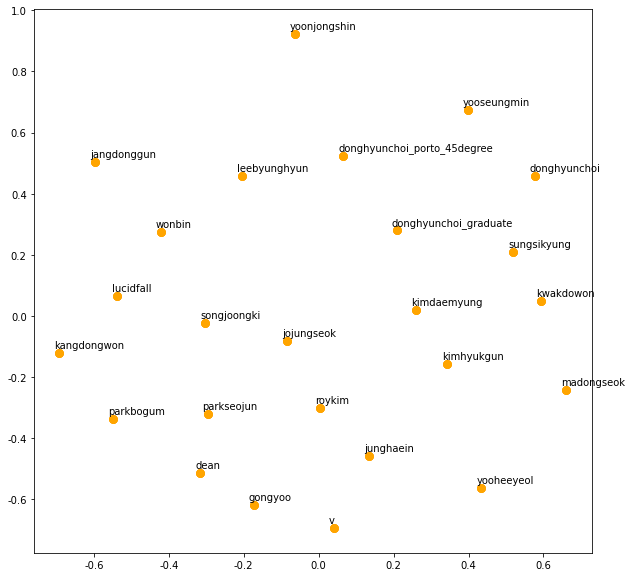

In [60]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
labels = face_df.index
for labels, x_count, y_count in zip(labels, face_MDS[:,0], face_MDS[:,1]):
    plt.annotate(labels, xycoords='data', textcoords='offset points', xy = (x_count, y_count), xytext=(-5,5))
    plt.scatter(face_MDS[:,0], face_MDS[:,1], color='orange', s=50)

## 차원축소가 진행된 만큼 앞선 순위에 비해 상대적 거리가 약간 달라진 것을 확인할 수 있습니다.
## 차원축소 전 순위를 구할때는 제 사진 donghyunchoi를 기준으로 한 거리 순위에서 roykim이 5위를 차지했으나 MDS에서는 상당히 거리가 떨어져 있음을 알 수 있습니다.
## 하나의 기준점이 아니라 전체에 대한 상대적 거리를 계산하는 MDS의 특성상 거리의 변화가 있을 수도 있겠다는 생각이듭니다.
## 거리의 변화가 생겼다고 하더라도 전체적인 상대적 위치를 확인할 수 있다는 점에서 이번 프로젝트에 충분히 활용하기 좋은 기법이었다고 생각됩니다.